# Два указателя

In [2]:
# Нужно найти максимальное число одинаковых подряд идущих символов в строке.

def max_consecutive_elements(input_str):
    result, cur_letter_idx = 0, 0
    while cur_letter_idx < len(input_str):
        next_letter_idx = cur_letter_idx
        while next_letter_idx < len(input_str) \
        and input_str[next_letter_idx] == input_str[cur_letter_idx]:
            next_letter_idx += 1
        result = max(result, next_letter_idx - cur_letter_idx)
        cur_letter_idx = next_letter_idx
    return result 

In [6]:
print(max_consecutive_elements(['A', 'A', 'B', 'C', 'D', 'D', 'D']))
print(max_consecutive_elements('abobaa'))

3
2


# Ошибка в индексах off-by-one

Off-by-one — это ошибка в индексе на 1. Она может произойти:
* при вычислении индекса элемента массива,
* если перепутать строгий и нестрогий знаки неравенства.

Это самый распространённый класс ошибок в таких задачах. Задачи на два указателя дают на собеседованиях, чтобы убедиться, что разработчик способен не ошибиться в нескольких строках собственного кода и не вызвать исключение при работе с самыми стандартными структурами данных — массивами.


# Бинарный поиск

Есть упорядоченный массив целых чисел arr, нужно определить, есть ли в нём число X.

In [ ]:
def binary_search(arr, target):
    left_idx, right_idx = 0, len(arr)
    while left_idx < right_idx:
         mid_idx = (left_idx + right_idx) // 2
         if arr[mid_idx] == target:
            return True
        elif arr[mid_idx] < target:
            left_idx = mid_idx + 1
        else:
            right_idx = mid_idx
    return False 

# Рекурсия и поиск с возвратом

Рекурсия — это когда функция вызывает сама себя. Рекурсия — не какой-то конкретный алгоритм, а техника, которая позволяет реализовывать алгоритмы.


In [4]:
# Задача: написать функцию, которая принимает целое число n и возвращает n-ное число Фибоначчи.


# ITERATIVE 

# output
# -> 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, …

def fib_n(n):
    if n <= 1:
        return n
    prev, curr = 0, 1
    for _ in range(n-1):
        prev, curr = curr, curr+prev
    return curr

print(fib_n(10))


def nth_fibonacci(n):
    if n <= 1:
        return n
    previous, current = 0, 1
    for _ in range(n - 1):
        previous, current = current, previous + current
    return current 

print(nth_fibonacci(10))


55
55


In [5]:
# recursion

def nth_fibonacci(n):
    SENTINEL = -1
    # Переменная для мемоизации
    numbers = [SENTINEL] * (n + 1)

    def nth_fibonacci_(n):
        if n <= 1:
            return n
        elif numbers[n] != SENTINEL:
            return numbers[n]
        else:
            result = nth_fibonacci_(n - 1) + nth_fibonacci_(n - 2)
            numbers[n] = result
            return result

    return nth_fibonacci_(n) 

# Поиск с возвратом (Backtracking)
Это метод решения задач, где требуется перебор вариантов.

In [6]:
# дано число N, нужно сгенерировать все правильные скобочные последовательности из N открывающих и N закрывающих скобок.

def generate(n):
    result = []

    def generate_(left_open, left_closed, accum):
        if not left_open and not left_closed:
            result.append(accum)
            return
        if left_open:
            generate_(left_open - 1, left_closed, accum + '(')
        if left_closed > left_open:
            generate_(left_open, left_closed - 1, accum + ')')

    generate_(n, n, '')
    return result 

# Метод «Разделяй и властвуй» (Divide-and-conquer)

Этот метод работает так:
1. Исходные данные разделяются на несколько частей.
2. Для каждой из частей функция вызывается рекурсивно.
3. Результаты рекурсивных вызовов объединяются.
Этот метод лежит в основе эффективных алгоритмов сортировки.

# Сортировки

На собеседованиях редко просят написать именно алгоритм сортировки, кандидат может пользоваться функциями сортировки из стандартной библиотеки языка. Поэтому достаточно знать:
1. Время работы различных алгоритмов сортировок в среднем и худшем случае.
2. Затраты по памяти.
3. Общую идею реализации хотя бы одного быстрого алгоритма.
4. Как вызвать сортировку в вашем языке программирования.

Python: arr.sort() или sorted_arr = sorted(arr) — Timsort - https://ru.wikipedia.org/wiki/Timsort

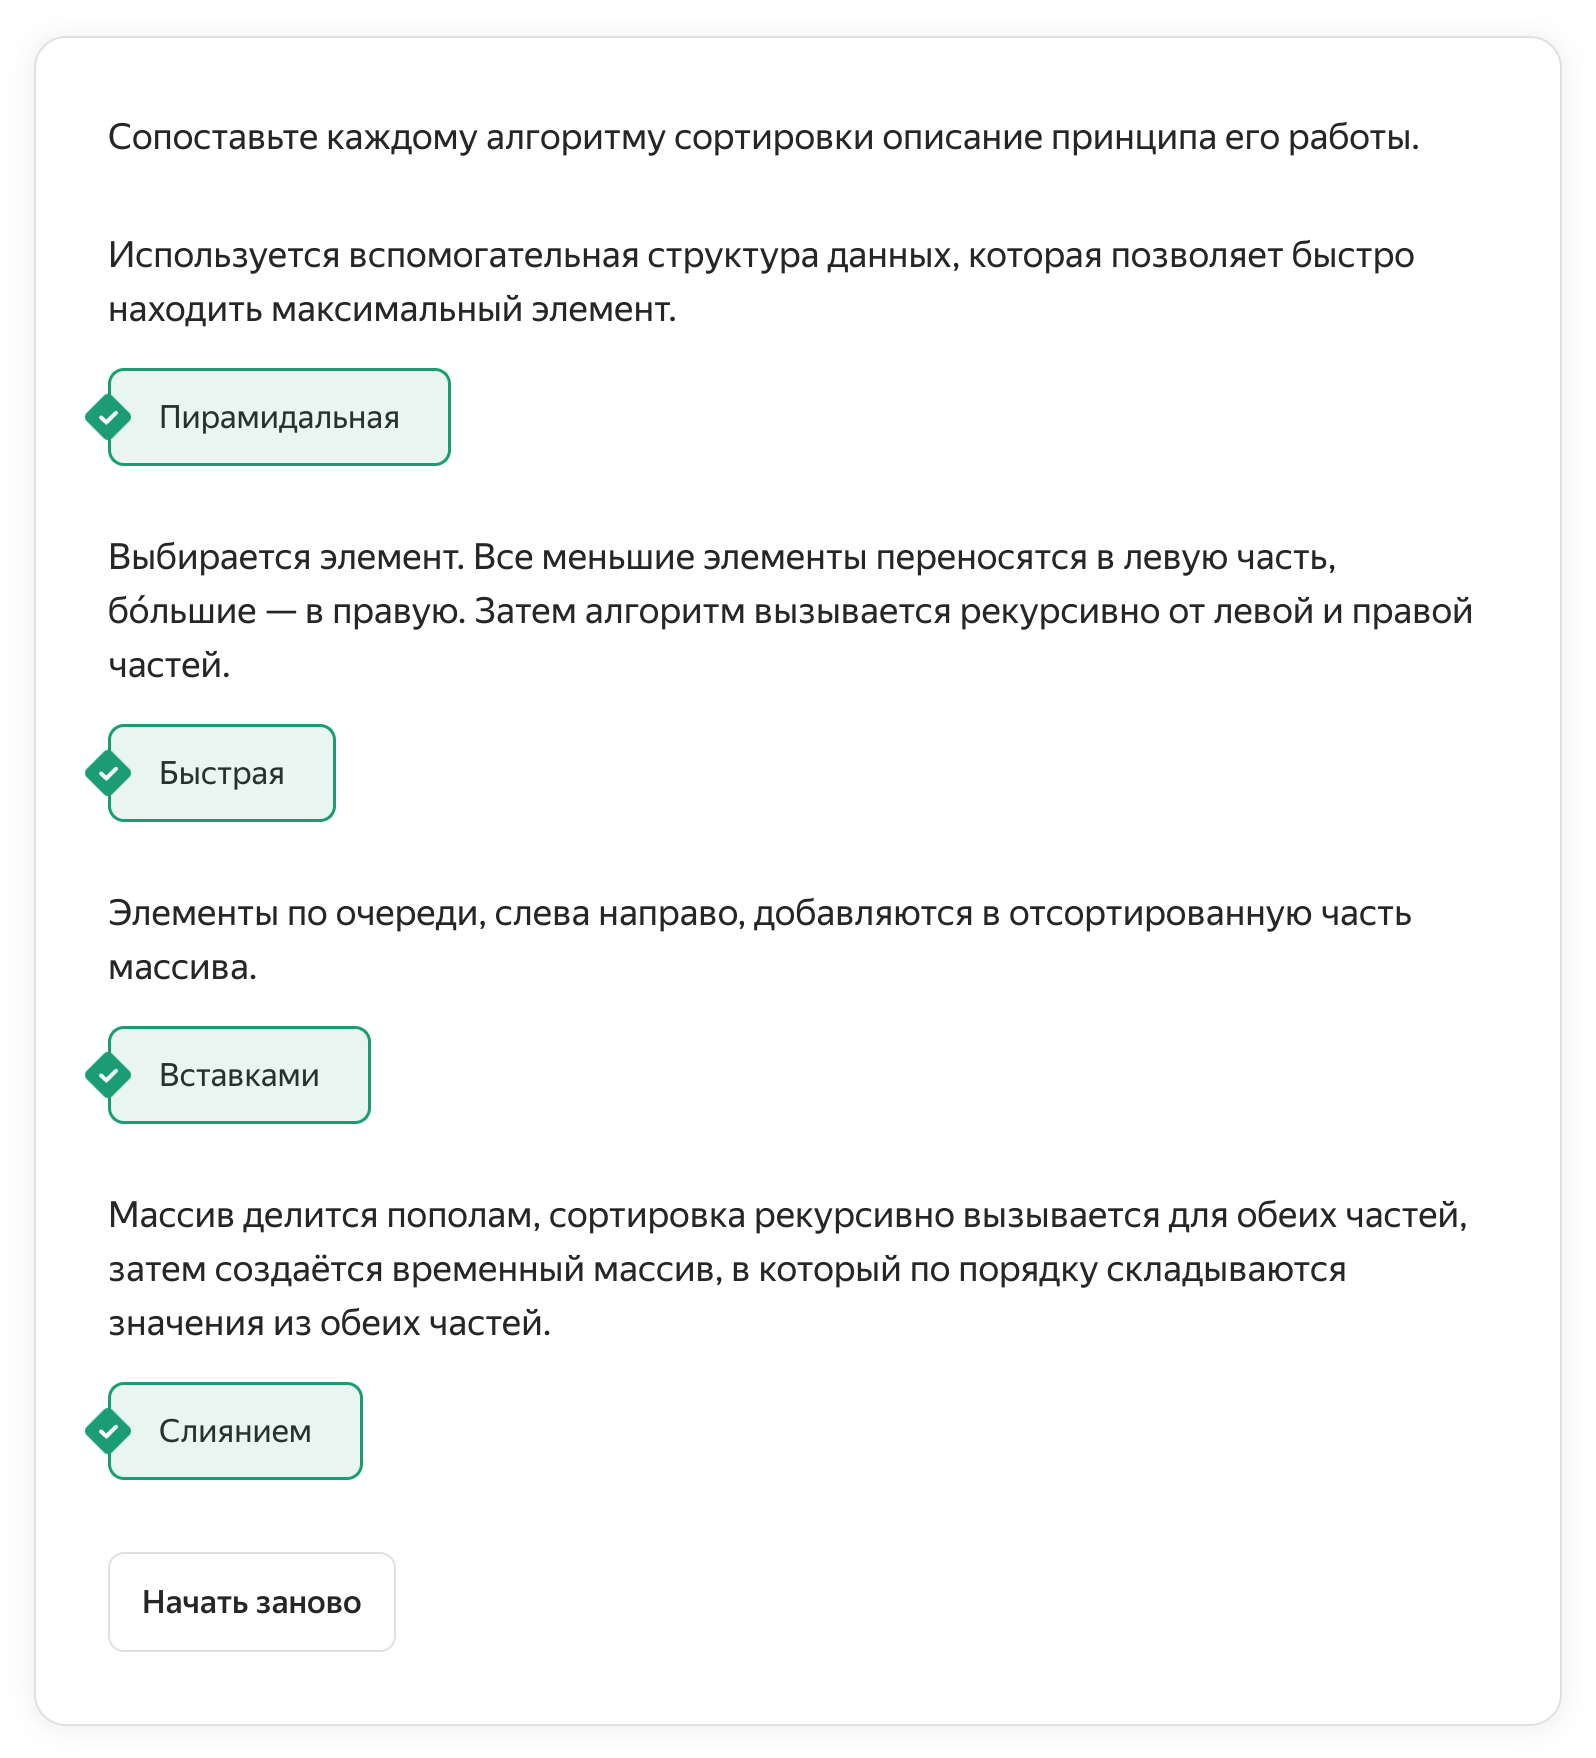

# Алгоритмы на графах

В реальной жизни графы встречаются часто, и на них можно считать разные интересные величины. На собеседованиях время сильно ограничено, поэтому задачи требуют только базовых навыков. Обычно в задаче требуется сделать что-то из следующего:
1. Проверить существование пути из одной вершины в другую или определить, является ли неориентированный граф связным.
2. Найти кратчайший путь в невзвешенном графе.
3. Найти кратчайший путь во взвешенном графе.

Первая задача решается поиском в глубину или ширину, вторая — поиском в ширину, третья — алгоритмом Дейкстры. Это стандартные алгоритмы, поэтому мы не будем приводить их реализацию.

# Деревья
На собеседованиях дерево задаётся одним из двух способов:

* Как обычный граф, матрицей смежности или списком смежных вершин. При этом гарантируется, что граф — дерево.
* Структурой, описывающей узел бинарного дерева. На вход вашему решению передаётся корень дерева. В подобной задаче вам может потребоваться описать такую структуру. Убедитесь, что помните, как это делать в вашем языке программирования. На всякий случай потренируйтесь решать задачи без подготовленного шаблона, чтобы не допустить ошибку на собеседовании.


Вспомним, какие бывают способы обхода деревьев.

1. Preorder: сначала посещаем текущую вершину, затем рассматриваем её поддеревья.
2. Inorder: рассматриваем левое поддерево, посещаем текущую вершину и затем рассматриваем правое поддерево. Применим только к бинарным деревьям.
3. Postorder: рассматриваем все поддеревья текущей вершины, затем посещаем её.

# Динамическое программирование

Метод динамического программирования
Очень неформально можно сказать, что метод динамического программирования заключается в том, чтобы найти некоторую вспомогательную величину, которая:

1. помогает получить ответ на задачу,
2. считается понятным образом.


# Жадные алгоритмы
**Жадный алгоритм** — такой, в котором на каждом шаге выбирается локально оптимальное решение.

Жадные алгоритмы — очень хитрая тема. Часто задача выглядит как решаемая с их помощью, а на самом деле это не так. Проблема в том, что надёжно доказать применимость жадного алгоритма сложно. Поэтому мы предлагаем несколько соображений:
1. На собеседованиях жадные алгоритмы чаще всего встречаются в задачах вроде первой задачи из этого урока — прорешайте их. Ещё полезно изучить темы, связанные с кодом Хаффмана и минимальным остовным деревом.
2. Если задача на какую-то другую тему, то старайтесь думать, что она НЕ решается жадным алгоритмом, и ищите другие способы.
3. Если вы всё-таки уверены, что задача решается жадным алгоритмом, постарайтесь придумать контрпримеры.
4. Если контрпримеры найти не получится, озвучьте решение интервьюеру. Он либо подтвердит вашу догадку, либо задаст правильное направление.
5. Если всё-таки получилось найти контрпример, не пытайтесь адаптировать жадный алгоритм под этот контрпример. Скорее всего, задача таким образом не решается и вы впустую потратите время. Возможно, стоит смотреть в сторону динамического программирования.